In [1]:
import cv2
import numpy as np
import pandas as pd
from scipy.sparse import coo_array
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def draw_line_on_grid(grid, x1, y1, x2, y2):    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    while True:
        grid[y1][x1] = 255
        
        if x1 == x2 and y1 == y2:
            break
        
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

In [3]:
spacia_metadata = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/spacia_metadata.txt',index_col=0)
spacia_metadata = spacia_metadata[spacia_metadata['spot_class']!= 'reject']
_cols = spacia_metadata['x'].to_numpy()
_rows = spacia_metadata['y'].to_numpy()
_cnt = spacia_metadata['first_type'].astype(bool).astype(int).to_numpy()
cnt = coo_array((_cnt, (_rows//50, _cols//50*1)), shape=(max(_rows//50)+1, max(_cols//50)+1))
image = (cnt.toarray() * 255).astype(np.uint8)
# plt.imshow(image, cmap='gray')
success, buffer = cv2.imencode('.png', image)
image = cv2.imdecode(buffer, cv2.IMREAD_UNCHANGED)
blurred = cv2.GaussianBlur(image, (7, 7), 0)
edge = cv2.Canny(blurred, 50, 450)  
print(edge.shape)

edge[0:125,0:233] = 0
edge[:,0:41] = 0
edge[180:243,0:233] = 0
edge[160:243,160:180] = 0
edge[148][218:233] = 255

(243, 233)


In [4]:
draw_line_on_grid(edge, 58,133,132,150)

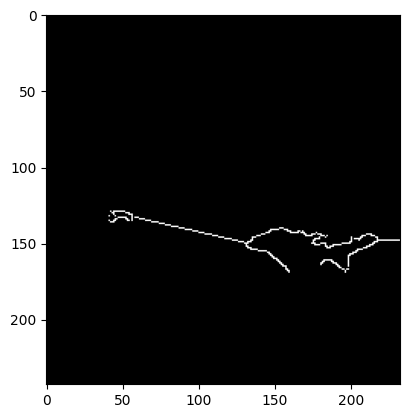

In [5]:
plt.imshow(edge, cmap='gray')

In [6]:
import numpy as np
arr = edge
coords = np.argwhere(arr != 0)

In [7]:
distances_all = []
for i in range(0,33410):
    point = np.array([int(spacia_metadata.iloc[i,5])/50,int(spacia_metadata.iloc[i,4])/50])  
    other_points = coords
    distances = np.linalg.norm(other_points - point, axis=1)
    min_distance = float(np.min(distances))
    distances_all.append(min_distance)
spacia_metadata['distances'] = distances_all

In [8]:
spacia_metadata

,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,...,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet,Spp1,Fosb,Jun,distances
7086696041100,lung,583,305,sample,1650,2700,1.029160,5252,1343,12,...,False,False,422.247443,474.353337,True,True,3.784190,0.0,0.0,75.538070
7086696041450,lung,507,254,sample,1650,3050,0.197239,5168,1396,12,...,False,False,391.736597,407.819178,True,True,2.197225,0.0,0.0,68.593003
7086696041850,lung,400,219,sample,1650,3450,0.000000,4995,1456,12,...,False,False,307.173513,315.969016,True,True,3.091042,0.0,0.0,60.671245
7086696041950,lung,420,216,sample,1650,3550,0.714286,5141,1443,12,...,False,False,335.043666,386.368967,True,True,2.772589,0.0,0.0,58.694122
7086696042500,lung,371,200,sample,1650,4100,1.347709,5081,1485,5,...,False,False,304.759482,356.480705,True,True,2.772589,0.0,0.0,47.853944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821620644700,lung,978,464,sample,11600,11100,0.715746,1088,464,9,...,False,False,619.357789,704.087390,True,True,2.772589,0.0,0.0,64.070274
49821620644750,lung,562,272,sample,11600,11150,0.177936,1030,303,1,...,False,False,387.745269,533.762261,True,True,1.609438,0.0,0.0,64.899923
49821620644800,lung,634,319,sample,11600,11200,0.000000,1014,331,2,...,False,False,425.001494,499.526816,True,True,0.693147,0.0,0.0,65.734314
49821620644900,lung,1025,481,sample,11600,11300,0.097561,1110,481,1,...,False,False,599.016478,644.403586,True,True,0.693147,0.0,0.0,67.416615


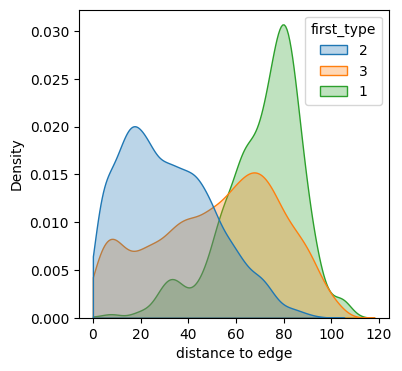

In [9]:
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)
sns.kdeplot(data=spacia_metadata[spacia_metadata["first_type"].isin(['1','2','3'])], x="distances", hue="first_type", fill=True, common_norm=False,alpha=0.3,clip=(0, None))
plt.xlabel('distance to edge')
plt.show()

In [10]:
spacia_metadata

,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,...,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet,Spp1,Fosb,Jun,distances
7086696041100,lung,583,305,sample,1650,2700,1.029160,5252,1343,12,...,False,False,422.247443,474.353337,True,True,3.784190,0.0,0.0,75.538070
7086696041450,lung,507,254,sample,1650,3050,0.197239,5168,1396,12,...,False,False,391.736597,407.819178,True,True,2.197225,0.0,0.0,68.593003
7086696041850,lung,400,219,sample,1650,3450,0.000000,4995,1456,12,...,False,False,307.173513,315.969016,True,True,3.091042,0.0,0.0,60.671245
7086696041950,lung,420,216,sample,1650,3550,0.714286,5141,1443,12,...,False,False,335.043666,386.368967,True,True,2.772589,0.0,0.0,58.694122
7086696042500,lung,371,200,sample,1650,4100,1.347709,5081,1485,5,...,False,False,304.759482,356.480705,True,True,2.772589,0.0,0.0,47.853944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821620644700,lung,978,464,sample,11600,11100,0.715746,1088,464,9,...,False,False,619.357789,704.087390,True,True,2.772589,0.0,0.0,64.070274
49821620644750,lung,562,272,sample,11600,11150,0.177936,1030,303,1,...,False,False,387.745269,533.762261,True,True,1.609438,0.0,0.0,64.899923
49821620644800,lung,634,319,sample,11600,11200,0.000000,1014,331,2,...,False,False,425.001494,499.526816,True,True,0.693147,0.0,0.0,65.734314
49821620644900,lung,1025,481,sample,11600,11300,0.097561,1110,481,1,...,False,False,599.016478,644.403586,True,True,0.693147,0.0,0.0,67.416615


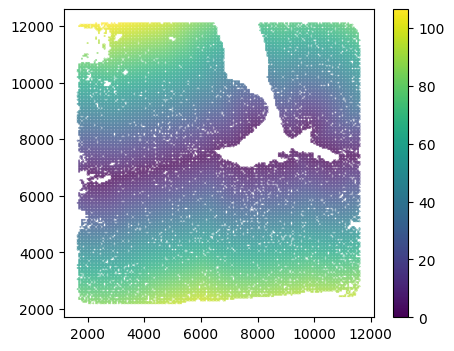

In [11]:
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 4)
sc = plt.scatter(data=spacia_metadata,x='x',y='y',s=0.1,c='distances',cmap='viridis')
plt.colorbar(sc)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure5/cell_distance_to_margin_heatmap.pdf')
plt.show()

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spateo as st
import dynamo as dyn

In [13]:
sc_adata = st.read_h5ad('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/h5ad/adata.h5ad')
metadata = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/metadata.T1_T2_T3a.harmony.final.refine.csv',header=0,index_col=0)
metadata.index = metadata['cellName'].to_list()
sc_adata = sc_adata[sc_adata.obs['cellname'].isin(metadata['cellName']),]
sc_adata.uns['pp'] = {}
sc_adata.uns['__type'] = 'UMI'
st.pp.filter.filter_genes(sc_adata, min_cells=3, inplace=True)
dyn.pp.normalize_cell_expr_by_size_factors(sc_adata, layers="X")
sc_adata

In [14]:
adata = st.read_h5ad('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/B03203C612.tissue.bin50.h5ad')
adata.obsm['spatial'] = np.array(adata.obs[['x', 'y']])
adata.obs['x_y'] = adata.obs['x'].astype('str') +'_'+ adata.obs['y'].astype('str') 
metadata = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/spacia_metadata.txt',index_col=0)
metadata = metadata.loc[(metadata['spot_class'] != 'reject') & (metadata['first_type'].isin(['1','2','3','4','5'])),]
metadata.index = metadata['x'].astype('str') +'_'+ metadata['y'].astype('str') 
adata_selected = adata[adata.obs['x_y'].isin(metadata.index),]
adata_selected.obs['celltype'] = metadata.loc[adata_selected.obs['x_y'],'first_type'].to_list()
adata_selected = adata_selected[adata_selected.obs['celltype'].isin(['1','2','3','4','5']),adata_selected.var_names[adata_selected.var_names.isin(sc_adata.var_names)]]

In [15]:
T2_a3026_gem = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/lasso/T2_a3026/segmentation/B03203C612.lasso.bin50.T2_a3026.gem.gz',
           skiprows=[0, 1, 2,3,4,5,6,7],sep='\t')
T2_a3026_gem = pd.DataFrame(index=list(set(T2_a3026_gem['x'].astype('str') + '_' + T2_a3026_gem['y'].astype('str'))))
T2_a3026_gem['sample'] = 'EE_a3026'

T2_a3028_gem = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/lasso/T2_a3028/segmentation/B03203C612.lasso.bin50.T2_a3028.gem.gz',
           skiprows=[0,1,2,3,4,5,6,7],sep='\t')
T2_a3028_gem = pd.DataFrame(index=list(set(T2_a3028_gem['x'].astype('str') + '_' + T2_a3028_gem['y'].astype('str'))))
T2_a3028_gem['sample'] = 'EE_a3028'

T2_a3030_gem = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/lasso/T2_a3030/segmentation/B03203C612.lasso.bin50.T2_a3030.gem.gz',
           skiprows=[0,1,2,3,4,5,6,7],sep='\t')
T2_a3030_gem = pd.DataFrame(index=list(set(T2_a3030_gem['x'].astype('str') + '_' + T2_a3030_gem['y'].astype('str'))))
T2_a3030_gem['sample'] = 'EE_a3030'

T2_gem = pd.concat([T2_a3026_gem,T2_a3028_gem,T2_a3030_gem],axis=0)

adata_selected = adata_selected[adata_selected.obs['x_y'].isin(T2_gem.index),]
adata_selected.obs['sample'] = T2_gem.loc[adata_selected.obs['x_y'],'sample'].to_list()

In [16]:
spacia_metadata.index = spacia_metadata.index.astype('str')
adata_selected.obs['distance_to_margin'] = spacia_metadata.loc[adata_selected.obs.index,'distances'].to_list()
adata_selected.obs

In [17]:
print(adata_selected.X)

In [18]:
adata_selected.uns['pp'] = {}
adata_selected.uns['__type'] = 'UMI'
# Preprocessing
st.pp.filter.filter_genes(adata_selected,min_cells=200, inplace=True) #默认是3
st.pp.filter.filter_cells(adata_selected,min_expr_genes=20)
# Normalization
dyn.pp.normalize_cell_expr_by_size_factors(adata_selected, layers="X")

In [19]:
print(adata_selected.X)

In [20]:
import spateo
st.pp.select_hvf_seurat(adata_selected)

In [21]:
hvgs = adata_selected.var['highly_variable_features'].index[adata_selected.var['highly_variable_features']]

In [22]:
hvgs

In [23]:
adata_selected.var_names

## lasso

In [24]:
#adata_selected = adata_selected[:,hvgs]
adata_selected

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [26]:
adata_selected.obs

In [27]:
adata_selected_sample = adata_selected[:,hvgs]
expr_df = pd.DataFrame(adata_selected_sample.X.toarray())
expr_df.index = adata_selected_sample.obs_names.to_list()
expr_df.columns = adata_selected_sample.var_names.to_list()
boundary_dist = adata_selected_sample.obs['distance_to_margin']

X = expr_df.values

In [28]:
expr_df

In [29]:
adata_selected_sample = adata_selected[:,hvgs]
expr_df = pd.DataFrame(adata_selected_sample.X.toarray())
expr_df.index = adata_selected_sample.obs_names.to_list()
expr_df.columns = adata_selected_sample.var_names.to_list()
expr_df = (expr_df - np.mean(expr_df, axis=0)) / np.std(expr_df, axis=0)
boundary_dist = adata_selected_sample.obs['distance_to_margin']

X = expr_df.values
y = boundary_dist.values
lasso = LassoCV(cv=5, max_iter=5000,random_state=0)
lasso.fit(X, y)

In [30]:
expr_df

In [31]:
# 提取非零系数对应的基因
coef = lasso.coef_
selected_genes = expr_df.columns[coef != 0]
print("Selected genes:", selected_genes.tolist())

In [32]:
expr_df.columns[coef > 0].to_list()

In [33]:
expr_df.columns[coef < 0].to_list()

In [34]:
from scipy import stats

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 31 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'P', 'R', 'a', 'c', 'd', 'e', 'eight', 'equal', 'four', 'g', 'h', 'i', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 23, 25, 26, 27, 32, 42, 51, 53, 68, 70, 71, 72, 74, 75, 76, 80, 81, 82, 85, 86, 87, 88, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 31 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'P', 'R', 'a', 

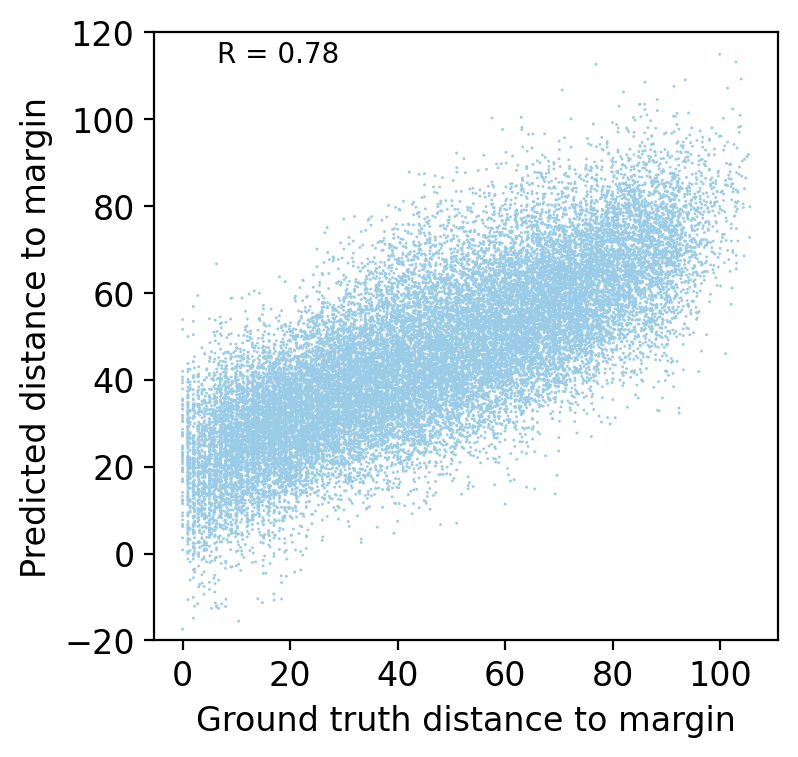

In [44]:
plt.figure(figsize=(4, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)

r_squared, p_value = stats.pearsonr(lasso.predict(X), y)
p_value = f'p value = {p_value:.1e}'
r_squared = f'R = {r_squared:.2f}'

distance_x_y = pd.DataFrame(y)
distance_x_y.columns = ['Ground_truth_distances']
distance_x_y['Predicted_distances'] = lasso.predict(X)
ratio = 2*0.15/0.28
sns.scatterplot(data=distance_x_y,x='Ground_truth_distances',y='Predicted_distances',s=ratio,color='#9acce8',edgecolor='none')
#plt.plot([0,100], [0,100])
#plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 0.95, r_squared, transform=plt.gca().transAxes, fontsize=10)    
#plt.xlim(20,120)
plt.ylim(-20,120)
plt.ylabel('Predicted distance to margin', fontsize=12)
plt.xlabel('Ground truth distance to margin', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/spatial_predicted_distance_VS_ground_truth_distance.pdf')
plt.show()

<Figure size 500x400 with 0 Axes>

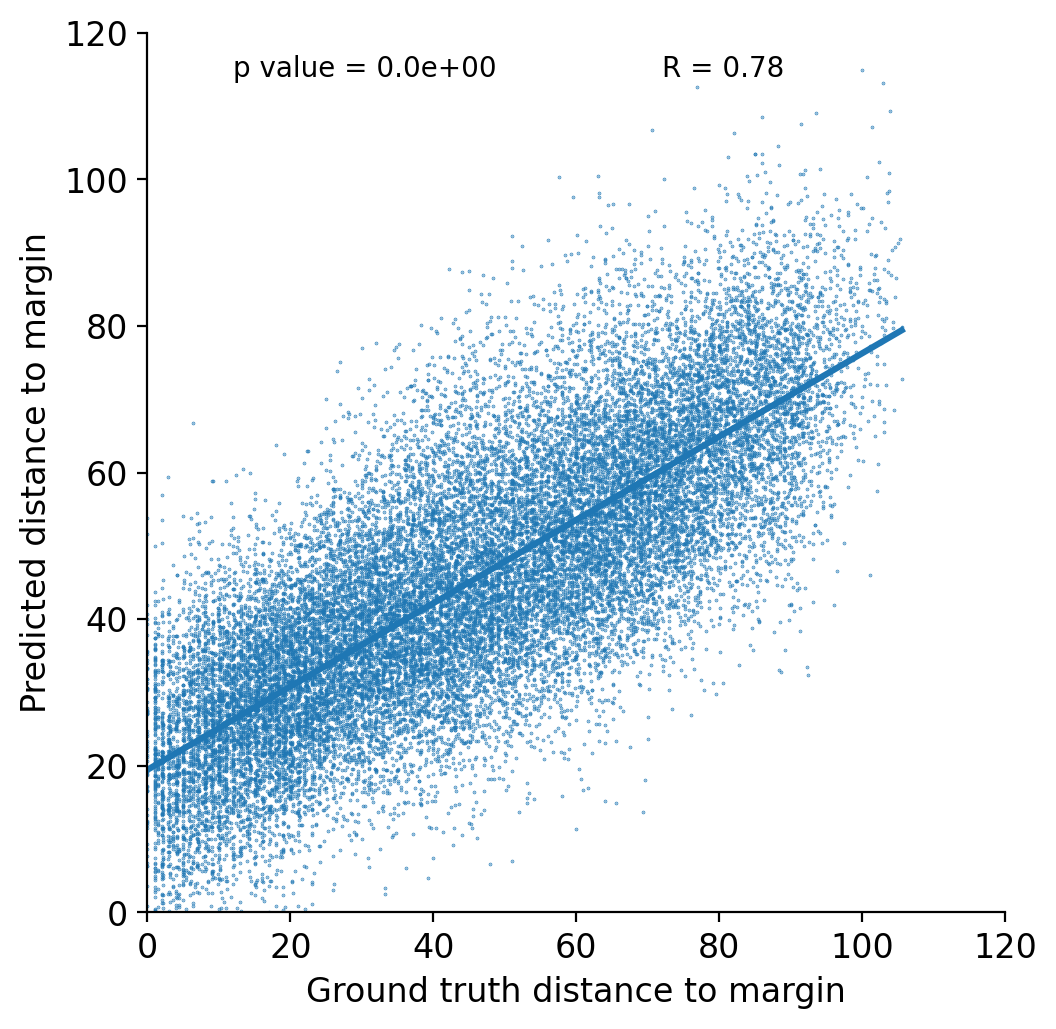

In [38]:
plt.figure(figsize=(5, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 4)

r_squared, p_value = stats.pearsonr(lasso.predict(X), y)
p_value = f'p value = {p_value:.1e}'
r_squared = f'R = {r_squared:.2f}'

distance_x_y = pd.DataFrame(y)
distance_x_y.columns = ['Ground_truth_distances']
distance_x_y['Predicted_distances'] = lasso.predict(X)

sns.lmplot(data=distance_x_y,x='Ground_truth_distances',y='Predicted_distances',lowess=False,ci=95,robust=True,
           scatter_kws={'s': 0.1,"color": "#1f77b4"},line_kws={"color": "#1f77b4"})

plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.6, 0.95, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.xlim(0,120)
plt.ylim(0,120)
plt.ylabel('Predicted distance to margin', fontsize=12)
plt.xlabel('Ground truth distance to margin', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
#plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/spatial_predicted_distance_VS_ground_truth_distance.pdf')
plt.show()

In [49]:
spatial_gene_sigature_score = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/spatial_gene_sigature_score.csv')
spatial_gene_sigature_score.index = spatial_gene_sigature_score['x'].astype('str') + '_' + spatial_gene_sigature_score['y'].astype('str')
spatial_gene_sigature_score

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,...,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet,spatial_signature_inner1,spatial_signature_outer1
1650_2700,7086696041100,lung,583,305,sample,1650,2700,1.029160,5252,1343,...,4,Fibroblast,False,False,422.247443,474.353337,True,True,0.086568,-0.005526
1650_2750,7086696041150,lung,368,201,sample,1650,2750,1.086957,5126,1510,...,3,endothelial,False,False,290.917181,330.917181,True,True,0.046601,-0.031998
1650_3000,7086696041400,lung,445,238,sample,1650,3000,0.224719,5092,1414,...,2,Macrophage,False,False,388.959354,428.959354,True,True,0.077291,0.007213
1650_3050,7086696041450,lung,507,254,sample,1650,3050,0.197239,5168,1396,...,4,endothelial,False,False,391.736597,407.819178,True,True,0.097309,-0.026074
1650_3450,7086696041850,lung,400,219,sample,1650,3450,0.000000,4995,1456,...,2,Macrophage,False,False,307.173513,315.969016,True,True,0.111603,0.022120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11600_11200,49821620644800,lung,634,319,sample,11600,11200,0.000000,1014,331,...,2,Macrophage,False,False,425.001494,499.526816,True,True,0.057278,0.068838
11600_11250,49821620644850,lung,703,345,sample,11600,11250,0.853485,1033,352,...,1,Monocyte,False,False,442.097013,482.097013,True,True,0.050648,-0.003439
11600_11300,49821620644900,lung,1025,481,sample,11600,11300,0.097561,1110,481,...,2,Monocyte,False,False,599.016478,644.403586,True,True,0.071596,0.029753
11600_11350,49821620644950,lung,636,338,sample,11600,11350,1.100629,1003,351,...,5,Macrophage,False,False,497.104525,537.104525,True,True,0.061970,0.044796


In [50]:
adata_selected.obs['spatial_signature_inner1'] = spatial_gene_sigature_score.loc[adata_selected.obs['x_y'],'spatial_signature_inner1'].to_list()
adata_selected.obs['spatial_signature_outer1'] = spatial_gene_sigature_score.loc[adata_selected.obs['x_y'],'spatial_signature_outer1'].to_list()
adata_selected.obs

,orig.ident,x,y,x_y,celltype,sample,distance_to_margin,Size_Factor,initial_cell_size,spatial_signature_inner1,spatial_signature_outer1
7086696041850,sample,1650,3450,1650_3450,2,EE_a3026,60.671245,0.055603,389,0.111603,0.022120
7086696047000,sample,1650,8600,1650_8600,3,EE_a3028,37.107951,0.076758,537,0.092692,0.028809
7086696047150,sample,1650,8750,1650_8750,3,EE_a3028,40.024992,0.163522,1144,0.123945,0.036227
7086696047200,sample,1650,8800,1650_8800,2,EE_a3028,41.000000,0.122499,857,0.071158,0.072759
7086696047250,sample,1650,8850,1650_8850,2,EE_a3028,41.976184,0.133648,935,0.048051,0.055464
...,...,...,...,...,...,...,...,...,...,...,...
49821620642650,sample,11600,9050,11600_9050,2,EE_a3030,33.000000,0.209548,1466,0.060397,0.009000
49821620642800,sample,11600,9200,11600_9200,2,EE_a3030,36.000000,0.137793,964,0.029262,-0.006822
49821620642950,sample,11600,9350,11600_9350,2,EE_a3030,39.000000,0.145369,1017,0.015683,-0.006880
49821620643100,sample,11600,9500,11600_9500,3,EE_a3030,41.048752,0.134648,942,0.066755,0.017157


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'R', 'S', 'a', 'c', 'e', 'eight', 'equal', 'five', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'plus', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 14, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 39, 53, 54, 68, 70, 72, 74, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89]
INFO:fontTools.subset:Closed glyph list over 'MATH': 34 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef'

<Figure size 500x400 with 0 Axes>

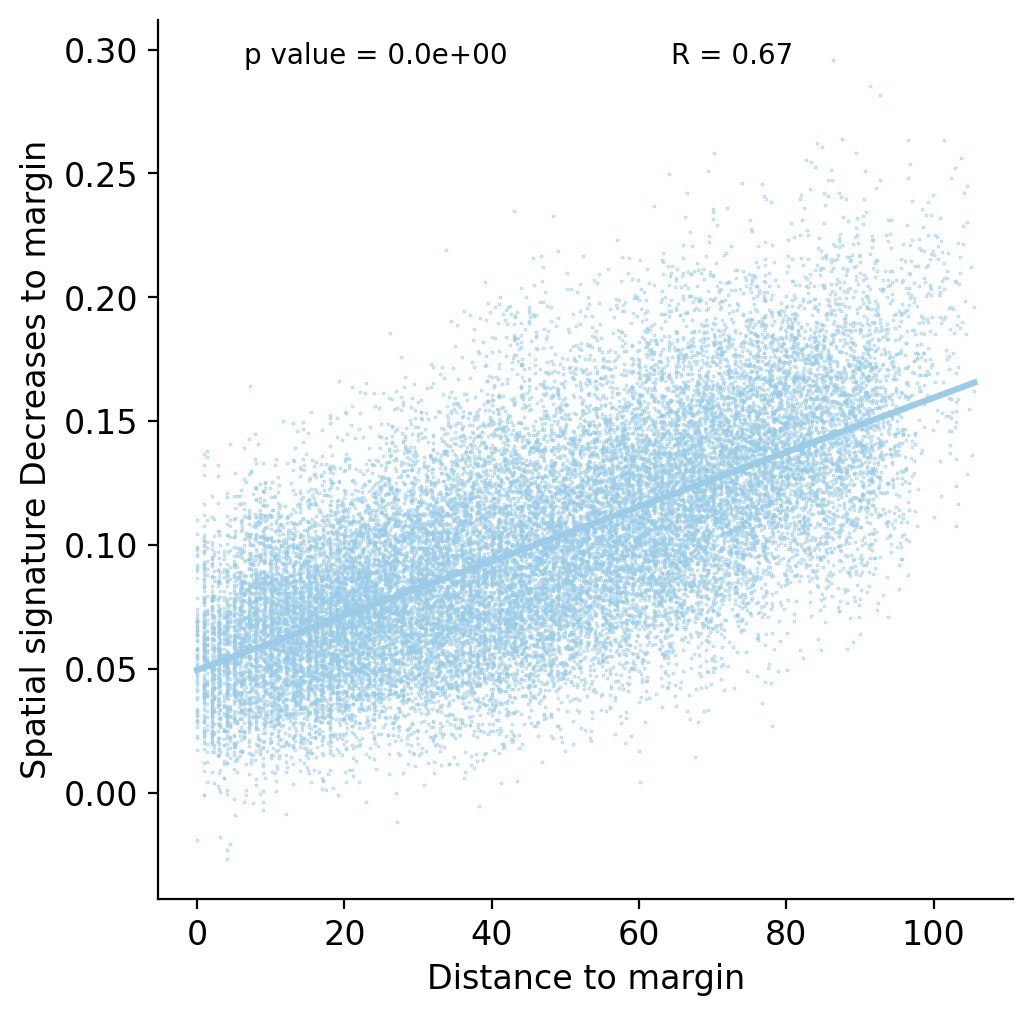

In [57]:
plt.figure(figsize=(5, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 4)

r_squared, p_value = stats.spearmanr(adata_selected.obs['distance_to_margin'], adata_selected.obs['spatial_signature_inner1'])
p_value = f'p value = {p_value:.1e}'
r_squared = f'R = {r_squared:.2f}'

sns.lmplot(data=adata_selected.obs,x='distance_to_margin',y='spatial_signature_inner1',lowess=False,ci=95,robust=True,
           scatter_kws={'s': 0.1,"color": "#9acce8"},line_kws={"color": "#9acce8"})

plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.6, 0.95, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.ylabel('Spatial signature Decreases to margin', fontsize=12)
plt.xlabel('Distance to margin', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/spatial_decrease_signature_VS_distance_to_margin.pdf')
plt.show()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'R', 'S', 'a', 'c', 'e', 'eight', 'equal', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'plus', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 14, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 32, 39, 53, 54, 68, 70, 72, 74, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 35 glyphs after
INFO:fontTools.subset:Glyph n

<Figure size 500x400 with 0 Axes>

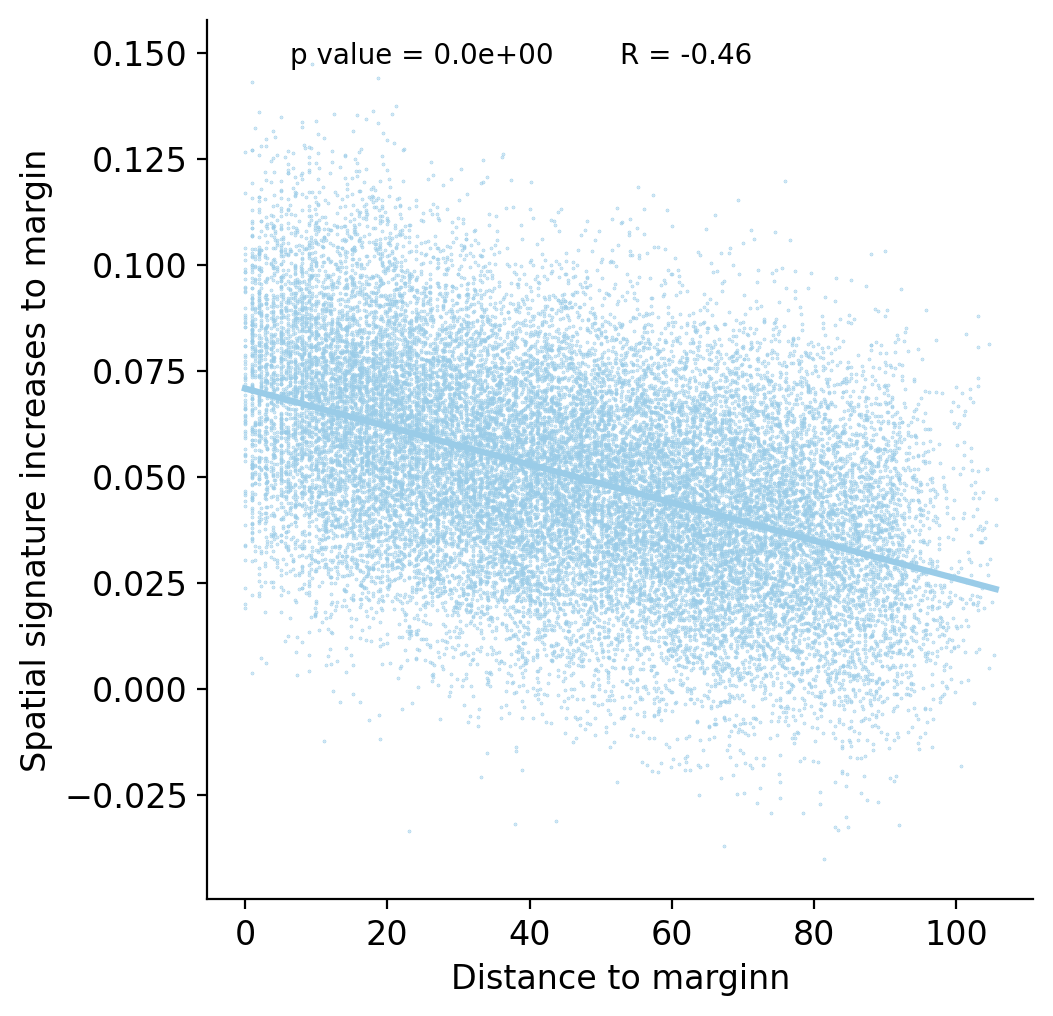

In [59]:
plt.figure(figsize=(5, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 4)

r_squared, p_value = stats.spearmanr(adata_selected.obs['distance_to_margin'], adata_selected.obs['spatial_signature_outer1'])
p_value = f'p value = {p_value:.1e}'
r_squared = f'R = {r_squared:.2f}'


sns.lmplot(data=adata_selected.obs,x='distance_to_margin',y='spatial_signature_outer1',lowess=False,ci=95,robust=True,
           scatter_kws={'s': 0.1,"color": "#9acce8"},line_kws={"color": "#9acce8"})

plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, 0.95, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.ylabel('Spatial signature increases to margin', fontsize=12)
plt.xlabel('Distance to marginn', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/spatial_increase_signature_VS_distance_to_margin.pdf')
plt.show()

In [42]:
sc_adata = sc_adata[:,hvgs]
expr_df = pd.DataFrame(sc_adata.X.toarray())
expr_df.index = sc_adata.obs_names.to_list()
expr_df.columns = sc_adata.var_names.to_list()
expr_df = (expr_df - np.mean(expr_df, axis=0)) / np.std(expr_df, axis=0)

X = expr_df.values

In [43]:
X

array([[ 1.52039392,  2.40135263,  1.06978504, ...,  0.8201481 ,
         1.21088455,  1.15330244],
       [ 0.17652176, -0.30702235,  2.29678433, ..., -0.05886178,
        -1.2686661 , -0.52733946],
       [-0.79104567, -0.30702235, -1.20209276, ...,  1.74953973,
         0.46178576, -0.52733946],
       ...,
       [ 0.53348313, -0.30702235,  0.28411426, ...,  0.6040303 ,
         1.31164881, -0.52733946],
       [-2.18484664, -0.30702235,  0.90930845, ...,  0.33572653,
         0.35531584, -0.52733946],
       [ 0.13500178, -0.30702235,  0.16820509, ..., -0.3888536 ,
         0.7574115 , -0.52733946]])

(array([8.3040e+03, 7.0720e+03, 1.8796e+04, 2.6350e+04, 2.1142e+04,
        8.2120e+03, 1.4160e+03, 1.1100e+02, 7.0000e+00, 1.0000e+00]),
 array([-2.18484664, -1.51951194, -0.85417724, -0.18884253,  0.47649217,
         1.14182687,  1.80716157,  2.47249627,  3.13783097,  3.80316567,
         4.46850037]),
 <BarContainer object of 10 artists>)

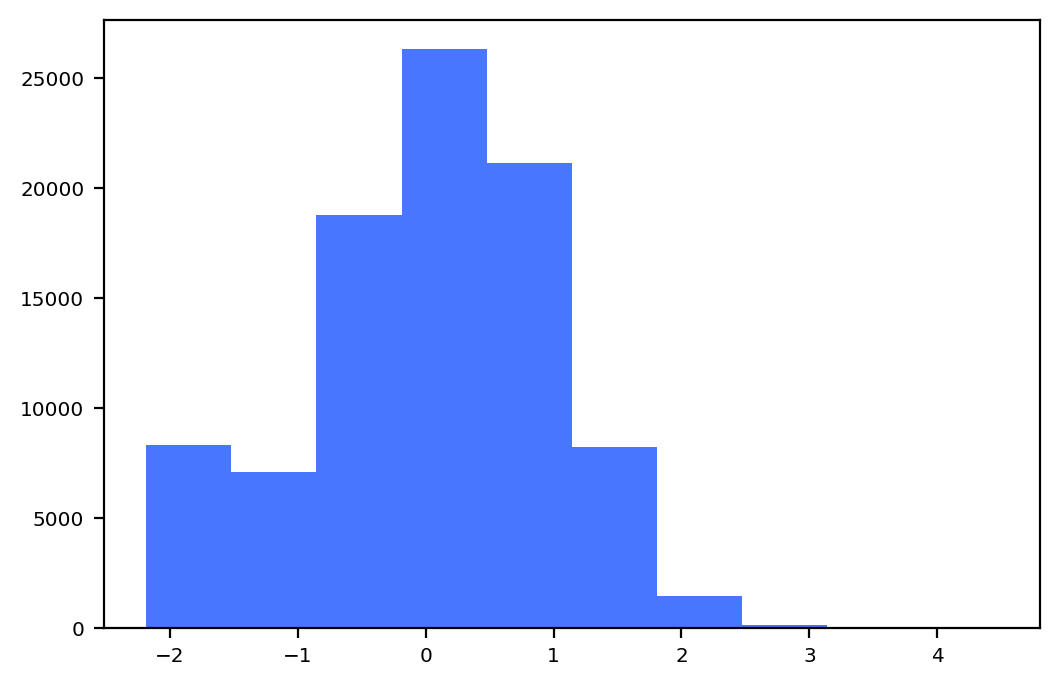

In [44]:
plt.hist(X[:,0])

In [45]:
sc_adata = sc_adata[:,hvgs]
expr_df = pd.DataFrame(sc_adata.X.toarray())
expr_df.index = sc_adata.obs_names.to_list()
expr_df.columns = sc_adata.var_names.to_list()
expr_df = (expr_df - np.mean(expr_df, axis=0)) / np.std(expr_df, axis=0)

X = expr_df.values
lasso.predict(X)

array([ 4.20169368, 51.58925377, 83.30056873, ..., 26.18795377,
       62.51534711, 29.54456177])

In [46]:
len(lasso.predict(X))

91411

In [47]:
sc_adata.obs['predicted_distance'] = lasso.predict(X)

/tmp/ipykernel_200916/2445022100.py:1: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [48]:
sc_adata.obs.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc_predicted_distance.csv')